In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [12]:
from algorithms import ChainTopology, RingTopology, QuadraticsTask, relaysum_model, relaysum_grad, relaysum_mix, all_reduce, gossip, d2, gradient_tracking, BinaryTreeTopology, gradient_tracking, time_varying_sgp
from random_quadratics import RandomQuadraticsTask
import torch
import math
import tuning
import pandas as pd
from warehouse import Warehouse

In [13]:
torch.set_default_dtype(torch.float64)

In [14]:
chain = ChainTopology
ring = RingTopology
tree = BinaryTreeTopology

In [15]:
warehouse = Warehouse()

In [16]:
num_steps = 2500
heterogeneity=1
d = 4
noise = 0.01

In [25]:
import pandas as pd
results = []

In [10]:
results = pd.read_pickle("effect_of_network_topology_tuning_results.pickle").to_dict("records")

In [ ]:
torch.set_default_dtype(torch.float64)
# sizes = [6, 12, 24, 48, 96, 192, 384]
# sizes = [350, 450]
eps = 1e-6
df = pd.DataFrame(results)
for seed in range(10):
    for sgd_noise in [0.0]:
        for heterogeneity in [0, 0.1, .01]:
            for r0 in [10]:
                params = dict(d=10, heterogeneity=heterogeneity, sgd_noise=sgd_noise, r0=r0, mu=0.5, seed=seed)
                for topology_name in ["ring", "tree"]:
                    for size in [4, 6, 8, 12, 16, 24, 32, 48, 64]:
                        task = RandomQuadraticsTask(size, **params)
    #                     for method_name, method in (("RelaySum/Model", relaysum_model), ("D2", d2), ("All-reduce", all_reduce)):
                        for method_name, method in (("Gossip", gossip), ("RelaySum/Grad", relaysum_grad)):

                            if topology_name == "ring" or topology_name == "chain":
                                if "RelaySum" in method_name:
                                    topology = chain(size)
                                    topology_name = "chain"
                                else:
                                    topology = ring(size)
                                    topology_name = "ring"
                            elif topology_name == "tree":
                                topology = tree(size)
                            else:
                                raise ValueError("topology_name")

                            if method_name in ["D2", "RelaySum/Model", "All-reduce"] and sgd_noise == 0:
                                best_time, best_lr = tuning.tune_fastest(start_lr=100, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                            elif sgd_noise == 0 and heterogeneity == 0:
                                best_time, best_lr = tuning.tune_fastest(start_lr=100, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                            else:
                                best_time, best_lr = tuning.tune_plateau(start_lr=100, desired_plateau=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)

                            row = {
                                **params,
                                "best_lr": best_lr,
                                "dtype": str(torch.get_default_dtype()).replace("torch.", ""),
                                "best_time": best_time,
                                "algorithm": method_name,
                                "eps": eps,
                                "num_workers": size,
                                "topology": topology_name
                            }
                            print(row)
                            results.append(row)
        df = pd.DataFrame(results)
        df.to_pickle("effect_of_network_topology_tuning_results.pickle")

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 4, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 16, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.1953125, 'dtype': 'float64', 'best_time': 27, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8,

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.067138671875, 'dtype': 'float64', 'best_time': 317, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.017547607421875, 'dtype': 'float64', 'best_time': 1128, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.0457763671875, 'dtype': 'float64', 'best_time': 387, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.009918212890625, 'dtype': 'float64', 'best_time': 1871, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.2197265625, 'dtype': 'float64', 'best_time': 92, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.0579833984375, 'dtype': 'float64', 'best_time': 340, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.152587890625, 'dtype': 'float64', 'best_time': 107, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr': 0.0335693359375, 'dtype': 'float64', 'best_time': 553, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 0, 'best_lr':

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.341796875, 'dtype': 'float64', 'best_time': 16, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.244140625, 'dtype': 'float64', 'best_time': 27, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.1403808

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.0579833984375, 'dtype': 'float64', 'best_time': 308, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.02288818359375, 'dtype': 'float64', 'best_time': 963, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.06103515625, 'dtype': 'float64', 'best_time': 361, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.014495849609375, 'dtype': 'float64', 'best_time': 1296, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.18310546875, 'dtype': 'float64', 'best_time': 93, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.079345703125, 'dtype': 'float64', 'best_time': 276, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.2197265625, 'dtype': 'float64', 'best_time': 87, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.048828125, 'dtype': 'float64', 'best_time': 379, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 1, 'best_lr': 0.1953

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 17, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.1953125, 'dtype': 'float64', 'best_time': 30, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.15869140625,

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.067138671875, 'dtype': 'float64', 'best_time': 299, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.02288818359375, 'dtype': 'float64', 'best_time': 863, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.0823974609375, 'dtype': 'float64', 'best_time': 226, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.009918212890625, 'dtype': 'float64', 'best_time': 1890, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_l

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.23193359375, 'dtype': 'float64', 'best_time': 81, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.0762939453125, 'dtype': 'float64', 'best_time': 258, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.29296875, 'dtype': 'float64', 'best_time': 54, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.0335693359375, 'dtype': 'float64', 'best_time': 558, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 2, 'best_lr': 0.2

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 16, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.244140625, 'dtype': 'float64', 'best_time': 29, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.1586914062

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0213623046875, 'dtype': 'float64', 'best_time': 963, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0732421875, 'dtype': 'float64', 'best_time': 268, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.017547607421875, 'dtype': 'float64', 'best_time': 1002, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.05340576171875, 'dtype': 'float64', 'best_time': 333, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 8, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr'

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0732421875, 'dtype': 'float64', 'best_time': 276, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.25634765625, 'dtype': 'float64', 'best_time': 66, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.06103515625, 'dtype': 'float64', 'best_time': 287, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.18310546875, 'dtype': 'float64', 'best_time': 83, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 8, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 3, 'best_lr': 0.032

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 18, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.20751953125, 'dtype': 'float64', 'best_time': 26, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.14266967

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.067138671875, 'dtype': 'float64', 'best_time': 299, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.030517578125, 'dtype': 'float64', 'best_time': 687, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.0579833984375, 'dtype': 'float64', 'best_time': 357, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.0152587890625, 'dtype': 'float64', 'best_time': 1581, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.23193359375, 'dtype': 'float64', 'best_time': 80, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.103759765625, 'dtype': 'float64', 'best_time': 201, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.1953125, 'dtype': 'float64', 'best_time': 94, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.0518798828125, 'dtype': 'float64', 'best_time': 462, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 4, 'best_lr': 0.292

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 17, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.1953125, 'dtype': 'float64', 'best_time': 26, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.166130065917

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.0732421875, 'dtype': 'float64', 'best_time': 293, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.01678466796875, 'dtype': 'float64', 'best_time': 1349, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.048828125, 'dtype': 'float64', 'best_time': 444, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.012969970703125, 'dtype': 'float64', 'best_time': 1728, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.244140625, 'dtype': 'float64', 'best_time': 83, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.0579833984375, 'dtype': 'float64', 'best_time': 391, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.1708984375, 'dtype': 'float64', 'best_time': 113, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 5, 'best_lr': 0.0457763671875, 'dtype': 'float64', 'best_time': 491, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu':

{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.4150390625, 'dtype': 'float64', 'best_time': 16, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.244140625, 'dtype': 'float64', 'best_time': 28, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
Too many iterations of tuning
{'d': 10, 'heterogeneity': 0, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.174713

{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0518798828125, 'dtype': 'float64', 'best_time': 402, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0213623046875, 'dtype': 'float64', 'best_time': 1074, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0518798828125, 'dtype': 'float64', 'best_time': 431, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.023651123046875, 'dtype': 'float64', 'best_time': 855, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_l

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.1708984375, 'dtype': 'float64', 'best_time': 115, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 4, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0732421875, 'dtype': 'float64', 'best_time': 308, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.177001953125, 'dtype': 'float64', 'best_time': 115, 'algorithm': 'RelaySum/Grad', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.08544921875, 'dtype': 'float64', 'best_time': 233, 'algorithm': 'Gossip', 'eps': 1e-06, 'num_workers': 8, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 10, 'mu': 0.5, 'seed': 6, 'best_lr': 0.2

In [12]:
df.sort_values("best_lr", ascending=False).head()

,algorithm,best_lr,best_time,d,dtype,eps,heterogeneity,mu,num_workers,r0,seed,sgd_noise,topology
568,Gossip,0.820923,9,10,float64,0.000001,0.0,0.5,24,10,5,0.0,tree
0,Gossip,0.781250,9,10,float64,0.000001,0.0,0.5,4,10,0,0.0,ring
248,Gossip,0.781250,10,10,float64,0.000001,0.0,0.5,48,10,2,0.0,tree
232,Gossip,0.781250,8,10,float64,0.000001,0.0,0.5,64,10,2,0.0,ring
234,Gossip,0.781250,10,10,float64,0.000001,0.0,0.5,4,10,2,0.0,tree


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
sns.set_theme("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{newtxmath}'
})

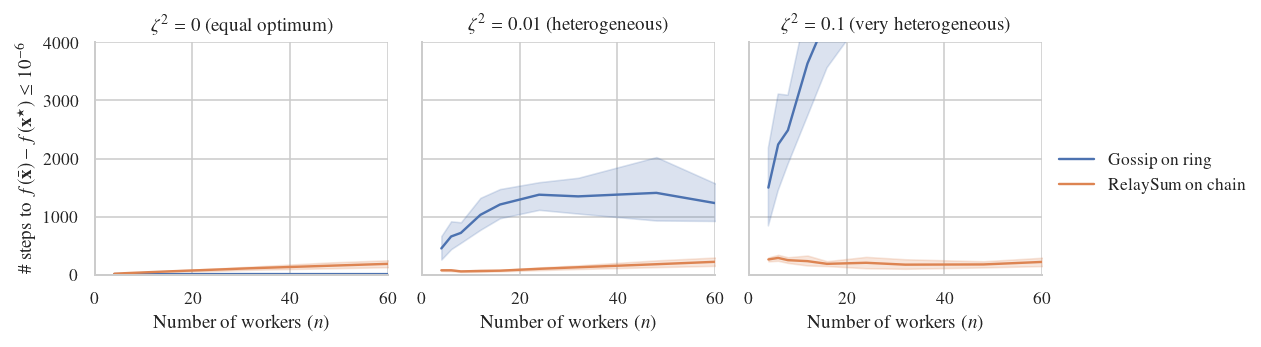

In [16]:
df["besttime"] = df["best_time"]
df["sgdnoise"] = df["sgd_noise"]
df["numworkers"] = df["num_workers"]
df = df.sort_values("heterogeneity")
df["zeta2name"] = df["heterogeneity"].replace({0: "0 (equal optimum)", .01: "0.01 (heterogeneous)", .1: "0.1 (very heterogeneous)"})
df["algorithmname"] = df.algorithm.replace({
    "Gossip": "Gossip on ring",
    "RelaySum/Grad": "RelaySum on chain",
})
subset = df[df.algorithm.isin(["RelaySum/Grad", "Gossip"]) & df.heterogeneity.isin([0, 0.01, 0.1])]
g = sns.FacetGrid(data = subset, hue="algorithmname", row="r0", col="zeta2name", height=2.5)
g.map(sns.lineplot, "numworkers", "besttime");
g.set(xlabel=r"Number of workers ($n$)")
g.set(ylabel=r"\# steps to $f(\bar{\mathbf{x}}) - f(\mathbf{x}^\star) \leq 10^{-6}$");
g.set_titles(r"$\zeta^2 =$ {col_name}")
plt.xlim([0, 60])
g.tight_layout()
plt.ylim([-10, 4000])
g.add_legend(title="");
g.savefig("effect_of_network_topology.pdf", bbox_inches="tight")

# Linearly converging methods

In [17]:
results = []

In [58]:
torch.set_default_dtype(torch.float64)
# sizes = [6, 12, 24, 48, 96, 192, 384]
# sizes = [350, 450]
eps = 1e-6
df = pd.DataFrame(results)
for seed in range(10):
    for sgd_noise in [0.0]:
        for heterogeneity in [.01, 1]:
            for r0 in [100]:
                params = dict(d=10, heterogeneity=heterogeneity, sgd_noise=sgd_noise, r0=r0, mu=0.5, seed=seed)
                for topology_name in ["ring", "tree"]:
                    for size in [6, 12, 24, 48, 96]: #+ [4, 8, 16, 32, 64]
#                     for size in [4, 6, 8, 12, 16, 24, 32, 48, 64]:
                        task = RandomQuadraticsTask(size, **params)
                        for method_name, method in (("RelaySum/Model", relaysum_model), ("All-reduce", all_reduce), ("Gradient tracking", gradient_tracking), ("D2", d2)):
#                         for method_name, method in (("Gossip", gossip), ("RelaySum/Grad", relaysum_grad)):

                            if method == d2 and topology_name == "tree":
                                pass
                            else:
                                if topology_name == "ring" or topology_name == "chain":
                                    if "RelaySum" in method_name:
                                        topology = chain(size)
                                        topology_name = "chain"
                                    else:
                                        topology = ring(size)
                                        topology_name = "ring"
                                elif topology_name == "tree":
                                    topology = tree(size)
                                else:
                                    raise ValueError("topology_name")

                                if method_name in ["D2", "RelaySum/Model", "All-reduce", "Gradient tracking"] and sgd_noise == 0:
                                    best_time, best_lr = tuning.tune_fastest(start_lr=10, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                                elif sgd_noise == 0 and heterogeneity == 0:
                                    best_time, best_lr = tuning.tune_fastest(start_lr=10, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                                else:
                                    best_time, best_lr = tuning.tune_plateau(start_lr=10, desired_plateau=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)

                                row = {
                                    **params,
                                    "best_lr": best_lr,
                                    "dtype": str(torch.get_default_dtype()).replace("torch.", ""),
                                    "best_time": best_time,
                                    "algorithm": method_name,
                                    "eps": eps,
                                    "num_workers": size,
                                    "topology": topology_name
                                }
                                print(row)
                                results.append(row)
        df = pd.DataFrame(results)
        df.to_pickle("effect_of_network_topology_tuning_results_linear.pickle")

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 23, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 9, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 51, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.56640625, 'dtype': 'float64', 'best_time': 19, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.83984375, 'dtype':

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 51, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.56640625, 'dtype': 'float64', 'best_time': 19, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.83984375, 'dtype': 'float64', 'best_time': 38, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 7, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.048828125, 'dtype': 'float64

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.8984375, 'dtype': 'float64', 'best_time': 37, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.07080078125, 'dtype': 'float64', 'best_time': 197, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 36, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.86914062

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.07080078125, 'dtype': 'float64', 'best_time': 197, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 36, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.869140625, 'dtype': 'float64', 'best_time': 65, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 24, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 6, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.01953125, 'dtype': 'f

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.8251953125, 'dtype': 'float64', 'best_time': 70, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 24, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 6, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.01953125, 'dtype': 'float64', 'best_time': 708, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.1324462890625, 'dtype': 'float64', 'best_time': 71, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.01953125, 'dtype': 'float64', 'best_time': 701, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.1324462890625, 'dtype': 'float64', 'best_time': 71, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.8544921875, 'dtype': 'float64', 'best_time': 129, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 48, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 6, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.0048828125, '

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.81787109375, 'dtype': 'float64', 'best_time': 131, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 48, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 6, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0042724609375, 'dtype': 'float64', 'best_time': 2673, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0469970703125, 'dtype': 'float64', 'best_time': 216, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'be

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0042724609375, 'dtype': 'float64', 'best_time': 2673, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0469970703125, 'dtype': 'float64', 'best_time': 216, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 48, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.83984375, 'dtype': 'float64', 'best_time': 248, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 96, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 5, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.00107765

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.84716796875, 'dtype': 'float64', 'best_time': 245, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 96, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 5, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.0011348724365234375, 'dtype': 'float64', 'best_time': 7799, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.04058837890625, 'dtype': 'float64', 'best_time': 268, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed':

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.0011348724365234375, 'dtype': 'float64', 'best_time': 7799, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.04058837890625, 'dtype': 'float64', 'best_time': 268, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 96, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.83984375, 'dtype': 'float64', 'best_time': 14, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 6, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 6, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 4, 'best_lr': 0.07812

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 6, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.078125, 'dtype': 'float64', 'best_time': 165, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 6, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.8984375, 'dtype': 'float64', 'best_time': 21, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 7, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.03417968

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.8984375, 'dtype': 'float64', 'best_time': 21, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 7, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.0390625, 'dtype': 'float64', 'best_time': 444, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.8837890625, 'dtype': 'float64', 'best_time': 25, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 24, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.78125, 'dt

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0390625, 'dtype': 'float64', 'best_time': 411, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.8984375, 'dtype': 'float64', 'best_time': 27, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 24, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 7, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 24, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.01953125, 'dtype': 'float64', 'best_time': 973, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 24, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.01953125, 'dtype': 'float64', 'best_time': 963, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 24, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.8544921875, 'dtype': 'float64', 'best_time': 32, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 48, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 6, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 48, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.0048828125, 'dtype': 'float64', 'best_time': 1890, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 48, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 6, 'best_lr': 0.8

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.0063323974609375, 'dtype': 'float64', 'best_time': 1550, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 48, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.83984375, 'dtype': 'float64', 'best_time': 37, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 96, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 5, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 96, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.00293731689453125, 'dtype': 'float64', 'best_time': 3292, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 96, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5,

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.00293731689453125, 'dtype': 'float64', 'best_time': 3292, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 96, 'topology': 'tree'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.869140625, 'dtype': 'float64', 'best_time': 21, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 6, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 10, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 50, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'b

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 10, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.3125, 'dtype': 'float64', 'best_time': 50, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.546875, 'dtype': 'float64', 'best_time': 19, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 1.044921875, 'dtype': 'float64', 'best_time': 37, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 8, 'best_lr': 0.78125, 'dtype': 'float64', 'b

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.33203125, 'dtype': 'float64', 'best_time': 26, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 6, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.810546875, 'dtype': 'float64', 'best_time': 38, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 12, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 7, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.0634765625, 'dtype': 'float64', 'best_time': 209, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.1953

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.0634765625, 'dtype': 'float64', 'best_time': 209, 'algorithm': 'Gradient tracking', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.1953125, 'dtype': 'float64', 'best_time': 46, 'algorithm': 'D2', 'eps': 1e-06, 'num_workers': 12, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 1.015625, 'dtype': 'float64', 'best_time': 71, 'algorithm': 'RelaySum/Model', 'eps': 1e-06, 'num_workers': 24, 'topology': 'chain'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 8, 'algorithm': 'All-reduce', 'eps': 1e-06, 'num_workers': 24, 'topology': 'ring'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.01953125, 'dtype': 'fl

In [38]:
results = [r for r in results if r["algorithm"] != "SGP"]

In [59]:
torch.set_default_dtype(torch.float64)
# sizes = [6, 12, 24, 48, 96, 192, 384]
# sizes = [350, 450]
eps = 1e-6
df = pd.DataFrame(results)
for seed in range(10):
    for sgd_noise in [0.0]:
        for heterogeneity in [0.01, 1]:
            for r0 in [100]:
                params = dict(d=10, heterogeneity=heterogeneity, sgd_noise=sgd_noise, r0=r0, mu=0.5, seed=seed)
                for topology_name in ["exponential"]:
                    for size in [4, 8, 16, 32, 64] + [6, 12, 24, 48, 96]:
#                     for size in :
#                     for size in [4, 6, 8, 12, 16, 24, 32, 48, 64]:
                        task = RandomQuadraticsTask(size, **params)
                        for method_name, method in (("SGP", time_varying_sgp),):
#                         for method_name, method in (("Gossip", gossip), ("RelaySum/Grad", relaysum_grad)):

                            if method == d2 and topology_name == "tree":
                                pass
                            else:
                                if topology_name == "ring" or topology_name == "chain":
                                    if "RelaySum" in method_name:
                                        topology = chain(size)
                                        topology_name = "chain"
                                    else:
                                        topology = ring(size)
                                        topology_name = "ring"
                                elif topology_name == "tree":
                                    topology = tree(size)
                                elif topology_name == "exponential":
                                    topology = tree(size)
                                else:
                                    raise ValueError("topology_name")

                                if method_name in ["D2", "RelaySum/Model", "All-reduce", "Gradient tracking", "SGP"] and sgd_noise == 0:
                                    best_time, best_lr = tuning.tune_fastest(start_lr=10, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                                elif sgd_noise == 0 and heterogeneity == 0:
                                    best_time, best_lr = tuning.tune_fastest(start_lr=10, target_quality=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)
                                else:
                                    best_time, best_lr = tuning.tune_plateau(start_lr=10, desired_plateau=eps, task=task, algorithm=method, topology=topology, max_steps=20000, num_test_points=1000)

                                row = {
                                    **params,
                                    "best_lr": best_lr,
                                    "dtype": str(torch.get_default_dtype()).replace("torch.", ""),
                                    "best_time": best_time,
                                    "algorithm": method_name,
                                    "eps": eps,
                                    "num_workers": size,
                                    "topology": topology_name
                                }
                                print(row)
                                results.append(row)
        df = pd.DataFrame(results)
        df.to_pickle("effect_of_network_topology_tuning_results_linear.pickle")

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 11, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 4, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.145263671875, 'dtype': 'float64', 'best_time': 67, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 8, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.24658203125, 'dtype': 'float64', 'best_time': 40, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 16, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.2392578125, 'dtype': 'float64', 'best_time': 39, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 32, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 0, 'best_lr': 0.283

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.031280517578125, 'dtype': 'float64', 'best_time': 320, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 24, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.01712799072265625, 'dtype': 'float64', 'best_time': 629, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 48, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 1, 'best_lr': 0.03276824951171875, 'dtype': 'float64', 'best_time': 299, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 96, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 10, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 4, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 2, 'best

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.0283050537109375, 'dtype': 'float64', 'best_time': 354, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 64, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.01438140869140625, 'dtype': 'float64', 'best_time': 838, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 6, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.01049041748046875, 'dtype': 'float64', 'best_time': 973, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 12, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3, 'best_lr': 0.01277923583984375, 'dtype': 'float64', 'best_time': 890, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 24, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 

{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.015869140625, 'dtype': 'float64', 'best_time': 737, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 8, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.01918792724609375, 'dtype': 'float64', 'best_time': 526, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 16, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.02017974853515625, 'dtype': 'float64', 'best_time': 537, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 32, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_lr': 0.03173828125, 'dtype': 'float64', 'best_time': 330, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 64, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 5, 'best_l

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.390625, 'dtype': 'float64', 'best_time': 22, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 96, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.78125, 'dtype': 'float64', 'best_time': 11, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 4, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.01094818115234375, 'dtype': 'float64', 'best_time': 1151, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 8, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.02017974853515625, 'dtype': 'float64', 'best_time': 526, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 16, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 7, 'best_lr': 0.02933

{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.1324462890625, 'dtype': 'float64', 'best_time': 79, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 12, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.25390625, 'dtype': 'float64', 'best_time': 39, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 24, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.198974609375, 'dtype': 'float64', 'best_time': 49, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 48, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.44921875, 'dtype': 'float64', 'best_time': 19, 'algorithm': 'SGP', 'eps': 1e-06, 'num_workers': 96, 'topology': 'exponential'}
{'d': 10, 'heterogeneity': 1, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 9, 'best_lr': 0.7

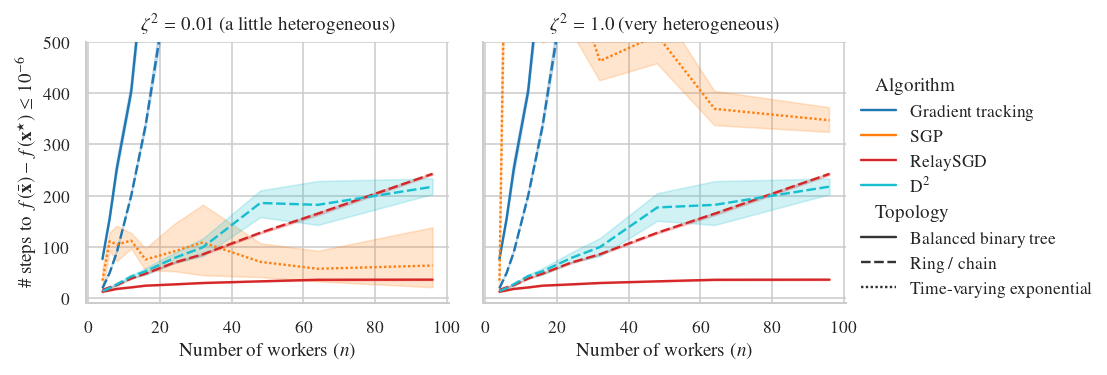

In [60]:
import seaborn as sns
sns.set_theme("paper")
sns.set_style("whitegrid")
import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{newtxmath}'
})
sns.set_palette([sns.color_palette("tab10")[i] for i in [0, 1, 3, 9, 7]])

df["besttime"] = df["best_time"]
df["sgdnoise"] = df["sgd_noise"]
df["numworkers"] = df["num_workers"]
df = df.sort_values("heterogeneity")
df["zeta2name"] = df["heterogeneity"].replace({0: "0", .01: "0.01 (a little heterogeneous)", .1: "0.1", 1: "1.0 (very heterogeneous)"})
df["Algorithm"] = df.algorithm.replace({
    "Gossip": "Gossip",
    "D2": "D$^2$",
    "RelaySum/Model": "RelaySGD",
})
df["Topology"] = df.topology.replace({
    "ring": "Ring / chain",
    "chain": "Ring / chain",
    "tree": "Balanced binary tree",
    "exponential": "Time-varying exponential",
})

df["Algorithm"] = pd.Categorical(
    df.Algorithm, categories=["Gradient tracking", "SGP", "RelaySGD", "D$^2$"])
df = df.sort_values(["heterogeneity", "Algorithm"])

subset = df[df.algorithm.isin(["RelaySum/Model", "D2", "Gradient tracking", "SGP"]) & df.heterogeneity.isin([0.01, 1])]
g = sns.relplot(data = subset, hue="Algorithm", row="r0", col="zeta2name", height=2.5, kind="line", x="numworkers", y="besttime", style="Topology", aspect=1.2)
g.set(xlabel=r"Number of workers ($n$)")
g.set(ylabel=r"\# steps to $f(\bar{\mathbf{x}}) - f(\mathbf{x}^\star) \leq 10^{-6}$");
g.set_titles(r"$\zeta^2 =$ {col_name}")
# g.set_titles("")
# plt.xlim([0, 64])
plt.ylim([-10, 500])
# g.add_legend(title="");
g.savefig("effect_of_network_topology_linear.pdf", bbox_inches="tight");

# Play with tuning

In [53]:
#Just testing things out
task = RandomQuadraticsTask(**{'d': 10, 'heterogeneity': 0.01, 'sgd_noise': 0.0, 'r0': 100, 'mu': 0.5, 'seed': 3,  'num_workers': 96}
)
tuning.tune_plateau(start_lr=10, desired_plateau=eps, task=task, algorithm=time_varying_sgp, topology=BinaryTreeTopology(32), max_steps=20000, num_test_points=1000, verbose=True)

Tryiing lr 10.0
- diverged 2 4390872.315155924
Tryiing lr 5.0
- diverged 2 120652.84360309558
Tryiing lr 2.5
- going up 30 5.294447332257479e-05
Tryiing lr 1.25
- going up 12 3.698662741660058e-06
Tryiing lr 0.625
- going up 28 1.2375842882925148e-06
Tryiing lr 0.3125
- reached plateau 124 2.8130379128334104e-07
Tryiing lr 0.46875
- reached plateau 229 5.551825641338335e-07
Tryiing lr 0.546875
- reached plateau 472 7.608951222553654e-07
Tryiing lr 0.5859375
- going up 30 1.1886163568033264e-06
Tryiing lr 0.56640625
- going up 30 1.2768413685439878e-06
Tryiing lr 0.556640625
- reached plateau 472 7.8378211788623e-07
Tryiing lr 0.5615234375
- going up 33 1.0016208197641263e-06
Tryiing lr 0.55908203125
- reached plateau 472 7.895397266660201e-07
Tryiing lr 0.560302734375
- reached plateau 472 7.924239511450613e-07
Tryiing lr 0.5609130859375
- going up 33 1.0002132066252306e-06
Tryiing lr 0.56060791015625
- reached plateau 472 7.931455732809503e-07
Tryiing lr 0.560760498046875
- reached pl

(124, 0.3125)

In [149]:
params = {'d': 10, 'heterogeneity': 0.1, 'sgd_noise': 0.0, 'r0': 1000, 'mu': 0.5, 'seed': 0}
size = 64
task = RandomQuadraticsTask(size, **params)
tuning.tune_fastest(start_lr=10, target_quality=1e-6, task=task, algorithm=d2, topology=ring(size), max_steps=20000, num_test_points=1000, verbose=True)

lr 20
- diverged 2 9320832918.949392
lr 10.0
- diverged 2 408063590.4556042
lr 5.0
- diverged 2 11354269.143616766
lr 2.5
- going up 5 55509.76075251182
lr 1.25
- going up 6 21.34883022274837
lr 0.625
- going up 14 2.06239992879792
lr 0.3125
- going up 35 0.20498747088138475
lr 0.15625
- going up 85 0.04946364636639666
lr 0.078125
- error 308 7.518308075271651e-07
lr 0.0390625
- error 610 8.548718196943472e-07
lr 0.09765625
- going up 207 2.0733549401630302e-05
lr 0.068359375
- going up 330 1.656591033544208e-06
lr 0.0537109375
- error 427 7.92746923883314e-07
lr 0.06103515625
- going up 361 2.576724155600729e-06
lr 0.057373046875
- error 415 7.528109555732243e-07
lr 0.0592041015625
- reached plateau 368 6.116741505718393e-06
lr 0.05828857421875
- error 411 9.154443718906169e-07
lr 0.058746337890625
- error 411 7.865456808919813e-07
lr 0.0589752197265625
- error 411 7.301270309456598e-07
lr 0.05908966064453125
- error 411 7.037103632034913e-07
lr 0.059146881103515625
- reached plateau 

(308, 0.0390625)